## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, optimizers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, Softmax, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.utils import plot_model

In [3]:
import jovian

<IPython.core.display.Javascript object>

## Load in the Data

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
 
# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 8s 0us/step


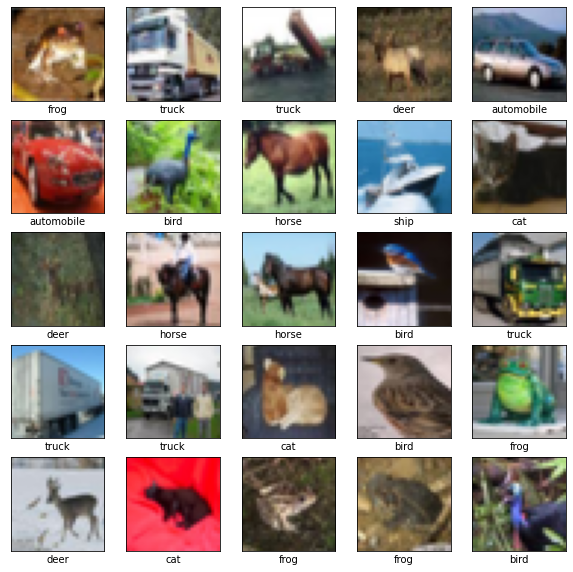

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Transfer Learning + Model


In [6]:
#Pre-trained model
ptr_model = VGG19(include_top = False, input_shape = (32,32,3))
ptr_model.trainable = True

80142336/80134624 [==============================] - 2s 0us/step


In [12]:
ptr_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

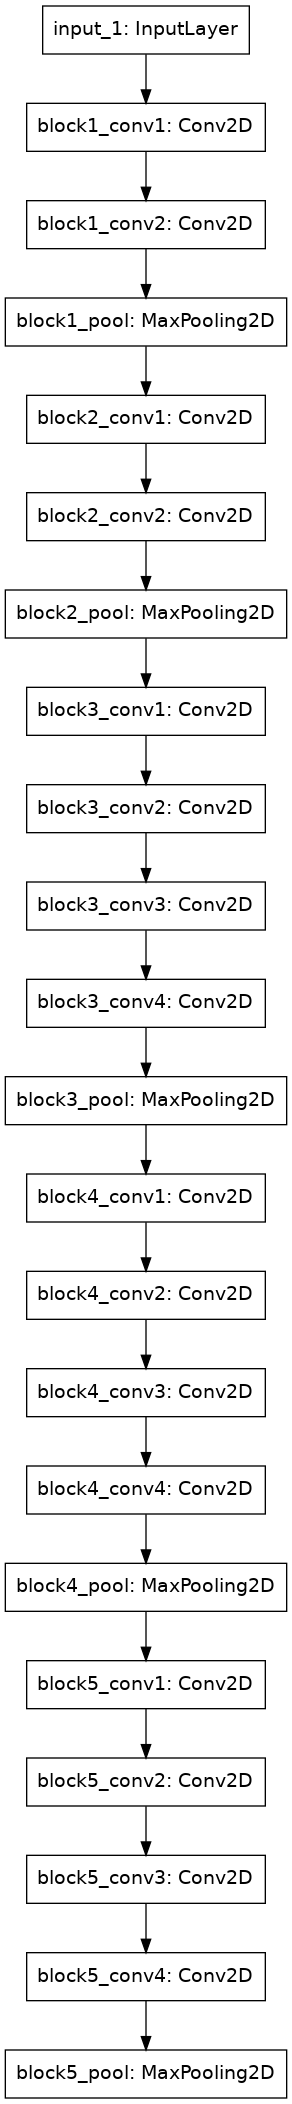

In [13]:
plot_model(ptr_model)

In [14]:
model = Sequential()

In [15]:
model.add(ptr_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 20,197,514
Trainable params: 20,197,514
Non-trainable params: 0
__________________________________________

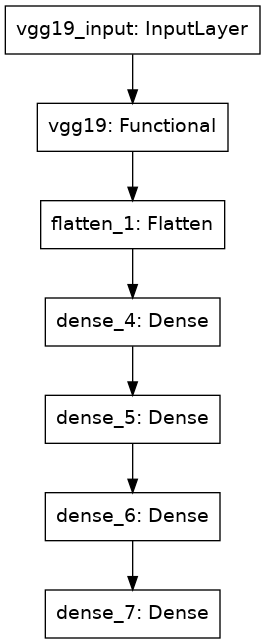

In [17]:
plot_model(model)

## Compiling and Fitting the model

In [18]:
Opt = optimizers.Adam(learning_rate=0.0001) #Other options: Adagrad, SGD, Adam... 
model.compile(optimizer=Opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 229s 146ms/step - loss: 0.8820 - accuracy: 0.7129 - val_loss: 0.7149 - val_accuracy: 0.7670
Epoch 2/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.5419 - accuracy: 0.8200 - val_loss: 0.5344 - val_accuracy: 0.8293
Epoch 3/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.3848 - accuracy: 0.8751 - val_loss: 0.5213 - val_accuracy: 0.8380
Epoch 4/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.2817 - accuracy: 0.9074 - val_loss: 0.5622 - val_accuracy: 0.8345
Epoch 5/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.2255 - accuracy: 0.9261 - val_loss: 0.5461 - val_accuracy: 0.8437
Epoch 6/10
1563/1563 [==============================] - 227s 145ms/step - loss: 0.1678 - accuracy: 0.9450 - val_loss: 0.5702 - val_accuracy: 0.8419
Epoch 7/10
1563/1563 [==============================] - 226s 145ms/step - loss: 0.1407 - accuracy: 0.9538 - val_

## Training history

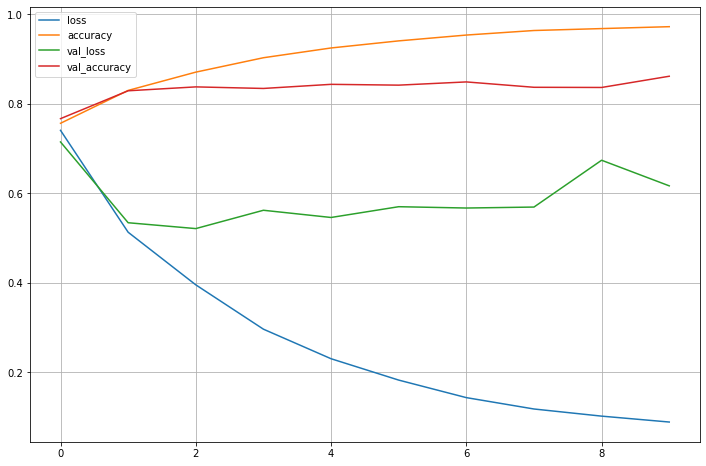

In [19]:
frame = pd.DataFrame(history.history)

frame.plot(figsize=(12,8))
plt.grid(True)
plt.show()

## Plot training history

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

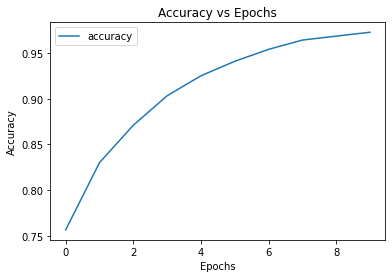

In [20]:
acc_plot = frame.plot(y='accuracy', title='Accuracy vs Epochs')
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

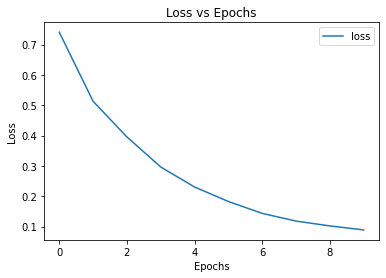

In [21]:
loss_plot = frame.plot(y='loss', title='Loss vs Epochs')
loss_plot.set(xlabel='Epochs', ylabel='Loss')

## Evaluation

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels , verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 - 33s - loss: 0.6168 - accuracy: 0.8618
Test loss: 0.6168049573898315
Test accuracy: 0.8618000149726868


## Prediction

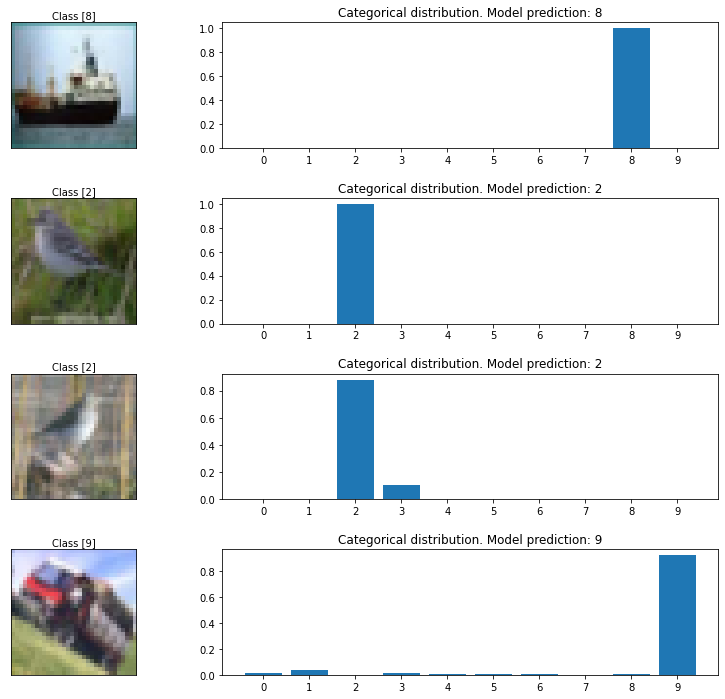

In [27]:
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Class {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

In [28]:
#class_names 

"""
0 - 'airplane'
1 - 'automobile'
2 - 'bird'
3 - 'cat'
4 - 'deer'  
5 - 'dog'
6 - 'frog'
7 - 'horse'
8 - 'ship'
9 - 'truck'
"""

"\n0 - 'airplane'\n1 - 'automobile'\n2 - 'bird'\n3 - 'cat'\n4 - 'deer'  \n5 - 'dog'\n6 - 'frog'\n7 - 'horse'\n8 - 'ship'\n9 - 'truck'\n"